In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy

In [46]:
!ls

'1.Data Pre-Processing.ipynb'		       featurextacted.csv
 2.ClassificationUsingCosineSimilarity.ipynb   non_clickbait_data
 3.Feature-Extractions.ipynb		       NonClickbaits.csv
 4.LogisticRegressionClassification.ipynb      POS.png
 clickbait_data				       README.md
 Clickbaits.csv				       Visualization.ipynb
 dataset.csv


In [47]:
clkbait = pd.read_csv("Clickbaits.csv")
nonclkbait = pd.read_csv("NonClickbaits.csv")
featdf = pd.read_csv("featurextacted.csv")

In [48]:
lenclick = len(clkbait)
lennonclick = len(nonclkbait)

In [49]:
featdf.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [50]:
nlp = spacy.load('en_core_web_sm')

In [51]:
def clickPOS():
    ccntPOS = []
    vrb,pron,aux,noun,det,propn,adp,punct,adv,adj,part,cconj,intj,x,num,sym,sconj,space = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    for i in range(lenclick):
        doc = nlp(clkbait["Clickbaits"][i])
        for token in doc:
            if token.pos_ == "VERB":
                vrb += 1
            elif token.pos_ == "PRON":
                pron += 1
            elif token.pos_ == "AUX":
                aux += 1
            elif token.pos_ == "NOUN":
                noun += 1
            elif token.pos_ == "DET":
                det += 1
            elif token.pos_ == "PROPN":
                propn += 1
            elif token.pos_ == "ADP":
                adp += 1
            elif token.pos_ == "PUNCT":
                punct += 1
            elif token.pos_ == "ADJ":
                adj += 1
            elif token.pos_ == "ADV":
                adv += 1
            elif token.pos_ == "PART":
                part += 1
            elif token.pos_ == "CCONJ":
                cconj += 1
            elif token.pos_ == "INTJ":
                intj += 1
            elif token.pos_ == "X":
                x += 1
            elif token.pos_ == "NUM":
                num += 1
            elif token.pos_ == "SYM":
                sym += 1
            elif token.pos_ == "SCONJ":
                sconj += 1
            elif token.pos_ == "SPACE":
                space += 1
            ccntPOS.append(token.pos_)
    clickPOS_CNT = [propn,part,noun,adv,cconj,pron,intj,adj,x,aux,num,adp,sym,vrb,det,punct,sconj,space]
    return (set(ccntPOS),clickPOS_CNT)

In [52]:
def nonclickPOS():
    nccntPOS = []
    vrb,pron,aux,noun,det,propn,adp,punct,adv,adj,part,cconj,intj,x,num,sym,sconj,space = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    for i in range(lennonclick):
        doc = nlp(nonclkbait["Clickbaits"][i])
        for token in doc:
            if token.pos_ == "VERB":
                vrb += 1
            elif token.pos_ == "PRON":
                pron += 1
            elif token.pos_ == "AUX":
                aux += 1
            elif token.pos_ == "NOUN":
                noun += 1
            elif token.pos_ == "DET":
                det += 1
            elif token.pos_ == "PROPN":
                propn += 1
            elif token.pos_ == "ADP":
                adp += 1
            elif token.pos_ == "PUNCT":
                punct += 1
            elif token.pos_ == "ADJ":
                adj += 1
            elif token.pos_ == "ADV":
                adv += 1
            elif token.pos_ == "PART":
                part += 1
            elif token.pos_ == "CCONJ":
                cconj += 1
            elif token.pos_ == "INTJ":
                intj += 1
            elif token.pos_ == "X":
                x += 1
            elif token.pos_ == "NUM":
                num += 1
            elif token.pos_ == "SYM":
                sym += 1
            elif token.pos_ == "SCONJ":
                sconj += 1
            elif token.pos_ == "SPACE":
                space += 1
            nccntPOS.append(token.pos_)
    nonclickPOS_CNT = [propn,part,noun,adv,cconj,pron,intj,adj,x,aux,num,adp,sym,vrb,det,punct,sconj,space]
    return (nonclickPOS_CNT)

In [53]:
labels,clickPOS_CNT = clickPOS()
nonclickPOS_CNT = nonclickPOS()
labels = list(labels)

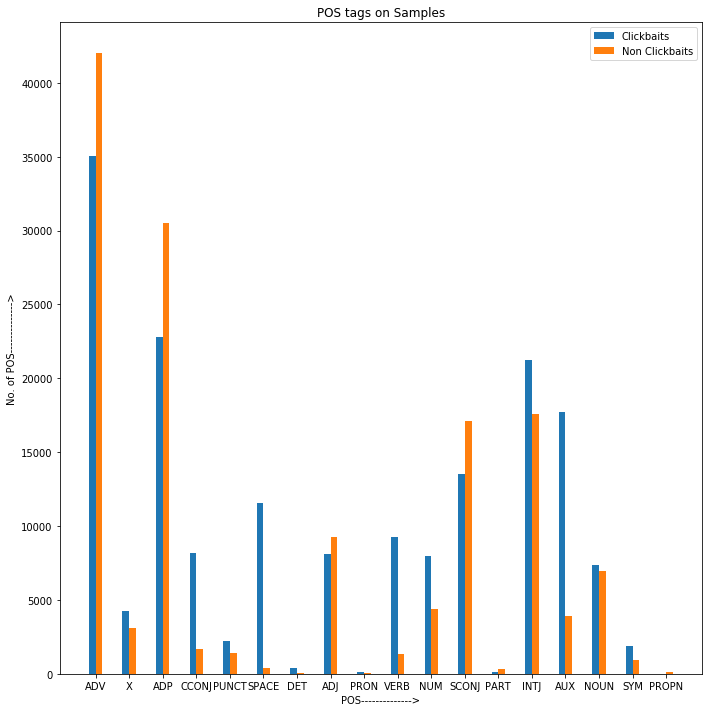

In [54]:
x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, clickPOS_CNT, width, label='Clickbaits')
rects2 = ax.bar(x + width/2, nonclickPOS_CNT, width, label='Non Clickbaits')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of POS-------------->')
ax.set_xlabel('POS-------------->')
ax.set_title('POS tags on Samples')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.savefig("POS.png")
plt.show()

In [61]:
# CCONJ = and or but ; Coordinating Conjunction
# AUX = be must should have has...

# Some Intuitions
We can see that proper nouns and nouns are relatively higher on the Non-Clickbaits probably because the non-clickbaits are more likely to have information regarding a place, person, country, etc As, a whole they are specific. But, since the Clickbaits are targeted for whole community of people they are less likely to be specific. That is why the no. of proper nouns and nouns are relatively higher on the Non-Clickbaits.

Also, it can be visualized that the ratio of pronouns, determiners are quite high on the clickbaits than that in the non-clickbaits. Because, the same reason the pronouns like you, i ,etc are used to attract the person on the internet to a particular place. eg. "You are our lucky user. You have won an amount of $10000." 
Similarly, same are the reasons for determiners being maximum used on the Clickbaits.

In [55]:
featdf.head()

,Clickbaits,bait,Length,AvgWordLength,StoptoContent
0,Declassified records show American inaction du...,0,77.0,6.800000,0.200000
1,Indian Maoists blamed for the deaths of sixtee...,0,57.0,5.444444,0.333333
2,Yahoo!7 creates joint venture with Xtra,0,39.0,5.666667,0.166667
3,Only Solve This Puzzle If You Love Board Games,1,46.0,4.222222,0.444444
4,Three dead in murder-suicide shooting at South...,0,81.0,6.454545,0.272727
